In [48]:
import sys
import os
import math
import numpy as np
sys.path.append('.')
import pickle
import CellModeller
import json
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

In [153]:
path = '../Data/CM_RepressilatorDeg03/'
files = os.listdir(path)
files.sort()
# not consider model file
files = files[1:]

#### funcs

In [154]:
# returns list with the IDs of cells that are in the x, y range
def cells_in_range(xmin, xmax, ymin, ymax, cs):
    cells_range = []
    for c in cs:
        if cs[c].pos[0] >= xmin and cs[c].pos[0] <= xmax:
            if cs[c].pos[1] >= ymin and cs[c].pos[1] <= ymax:
                cells_range.append(c)
    cells_range = np.array(cells_range)
    
    return cells_range

In [155]:
# returns discrete x domain, R, G, and B average fluo in the domain
def get_avg_fluo(cells_range):
    cr_len = len(cells_range)
    x = np.zeros(cr_len)
    y = np.zeros(cr_len)
    R = np.zeros(cr_len)
    G = np.zeros(cr_len)
    B = np.zeros(cr_len)
    
    for i, c in enumerate(cells_range):
        # discrete space for x
        x[i] = math.floor(cs[c].pos[0])
        y[i] = cs[c].pos[1]
        R[i], G[i], B[i] = cs[c].color[0], cs[c].color[1], cs[c].color[2]
        
    # for each x (discrete separation of x domain), compute average for R, G, B in the y axis
    x_disc = np.unique(x)
    R_avg = np.zeros(len(x_disc))
    G_avg = np.zeros(len(x_disc))
    B_avg = np.zeros(len(x_disc))

    for index, x_val in enumerate(x_disc):
        ind = np.where(x == x_val)
        ## average fluo in R, G, B channels, for position i in domain x
        R_avg[index] = np.mean(R[ind])
        G_avg[index] = np.mean(G[ind])
        B_avg[index] = np.mean(B[ind])
        
    return x_disc, R_avg, G_avg, B_avg

In [156]:
def make_video(image_folder, video_name):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    images.sort()
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 7, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

#### Read each pickle, obtain R, G, B avg Fluo in a discrete domain

In [122]:
# range to consider fluorescence in the y-axis
y_bound = 10
# store each pickle's info
database = []

# each picke file
for f in files:
    data = pickle.load(open(path+f,'rb'))
    cs = data['cellStates']
    it = iter(cs)
    #n = len(cs)
    
    pos_x = [cs[it].pos[0] for it in cs]
    xmin = math.ceil(min(pos_x))
    xmax = math.floor(max(pos_x))
    ymin = -y_bound
    ymax = y_bound
    
    # get cells in range
    cells_range = cells_in_range(xmin, xmax, ymin, ymax, cs)

    x_disc, R_avg, G_avg, B_avg = get_avg_fluo(cells_range)
    
    database.append([int(f[5:10]), list(x_disc), list(R_avg), list(G_avg), list(B_avg)])

In [123]:
# database has the form:
"""
[
    ...
    [it_n, [x1, x2, x3, ...], [r_avg1, r_avg2, r_avg3, ...], [g_avg1, g_avg2, _avg3, ...], [b_avg1, b_avg2, b_avg3, ...]]
    ...
]
"""

'\n[\n    ...\n    [it_n, [x1, x2, x3, ...], [r_avg1, r_avg2, r_avg3, ...], [g_avg1, g_avg2, _avg3, ...], [b_avg1, b_avg2, b_avg3, ...]]\n    ...\n]\n'

#### store data in a JSON file

In [124]:
with open('data_contDeg03.json', 'w') as outfile:  
    json.dump(database, outfile)

#### Generate png files from matplotlib plots

In [126]:
# I can use whatever "database" file, in this case I will use the file generated above
# but one could just read an existing file and generate the video, make analysis, etc

In [ ]:
# delete existing pngs in plots/
files = os.listdir('plots/')
for f in files:
    os.remove('plots/'+f)

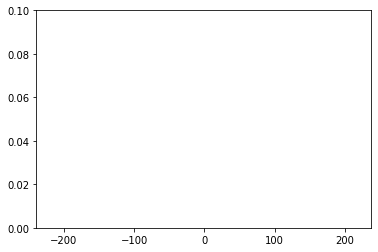

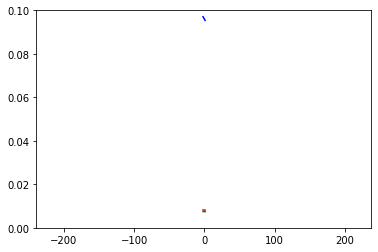

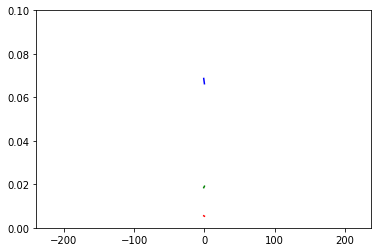

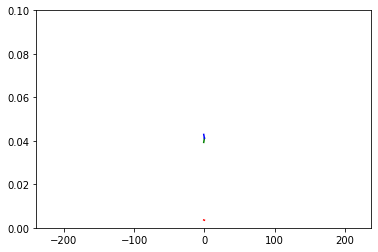

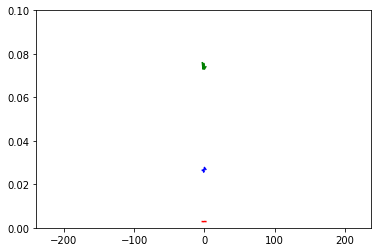

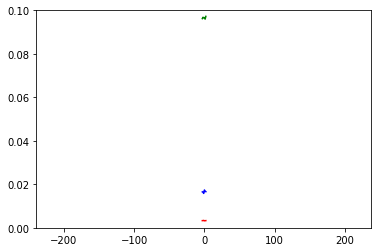

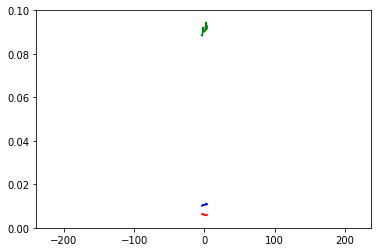

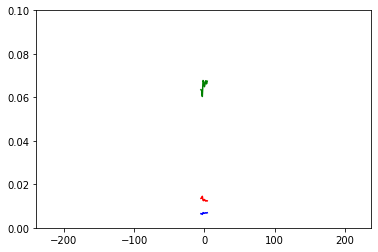

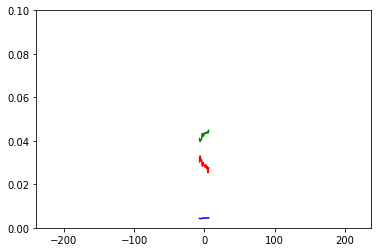

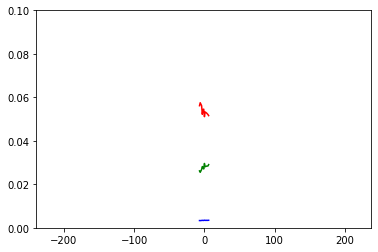

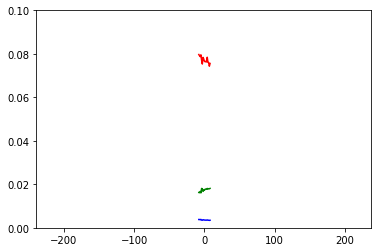

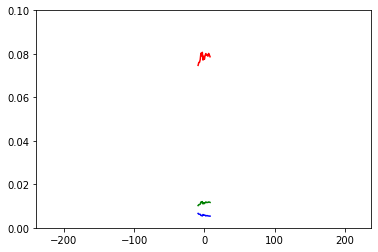

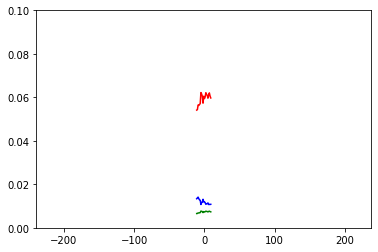

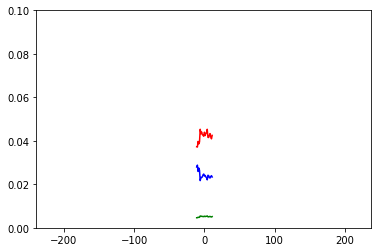

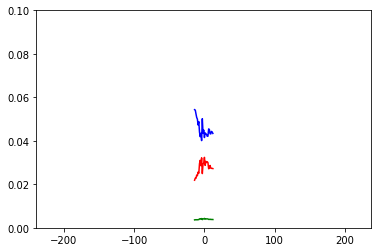

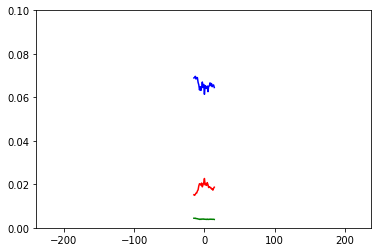

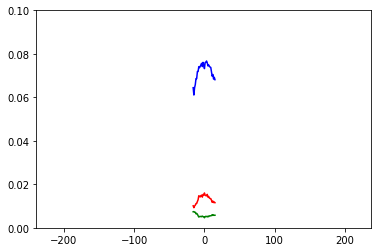

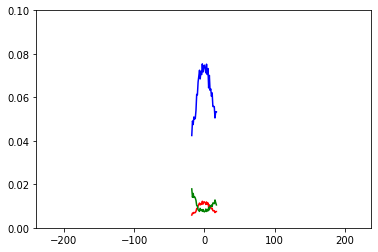

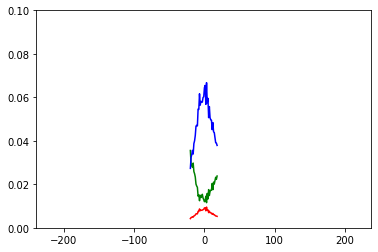

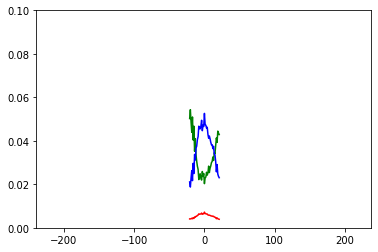

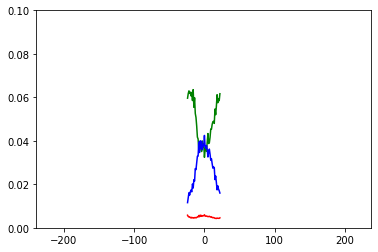

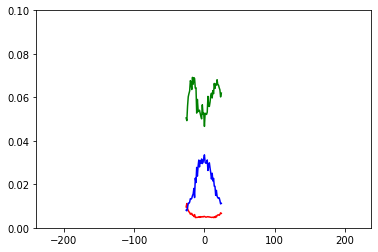

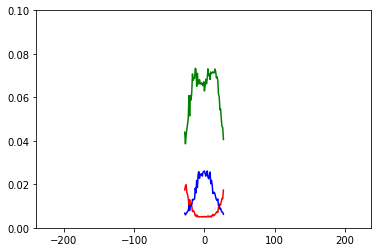

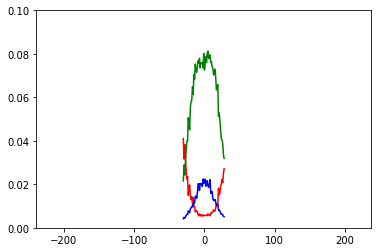

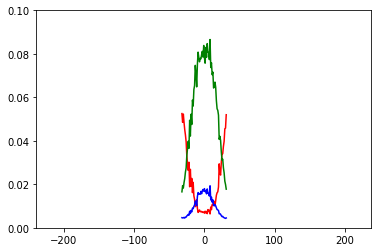

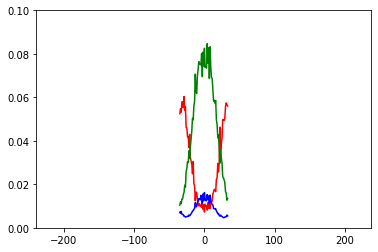

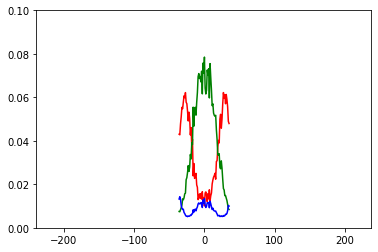

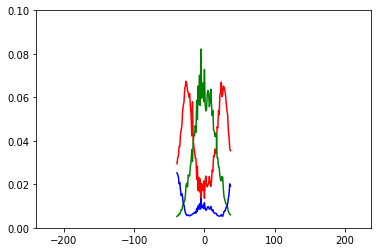

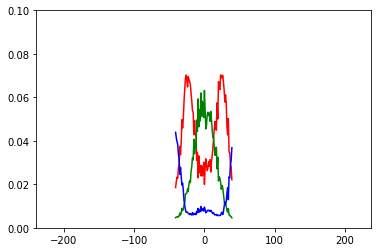

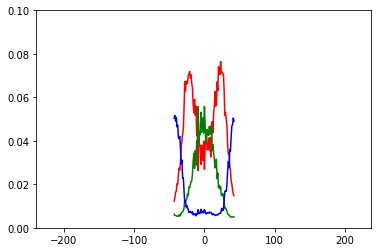

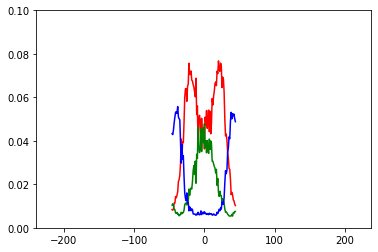

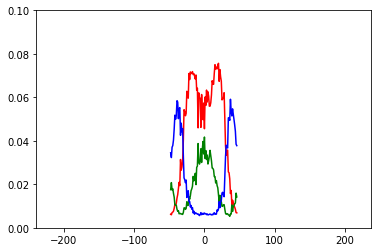

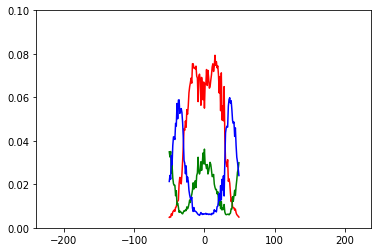

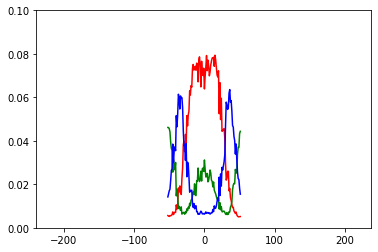

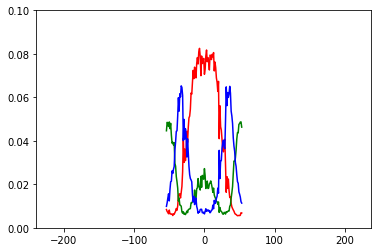

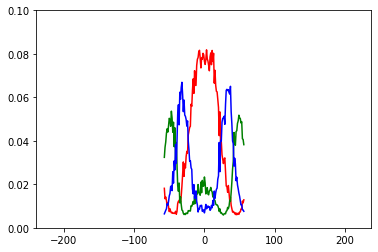

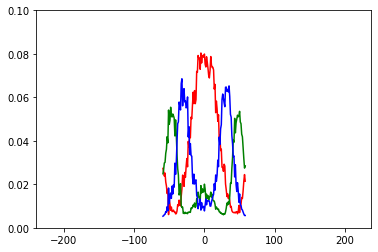

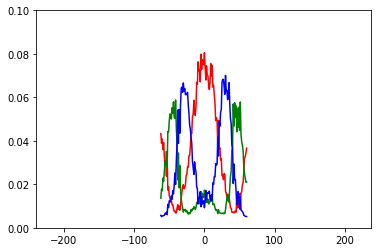

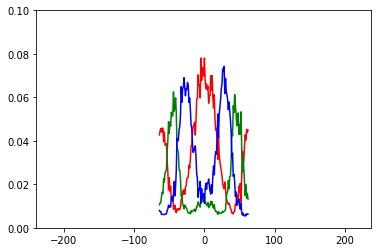

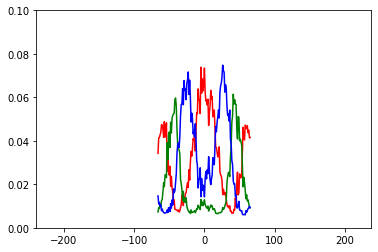

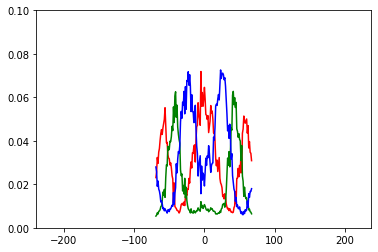

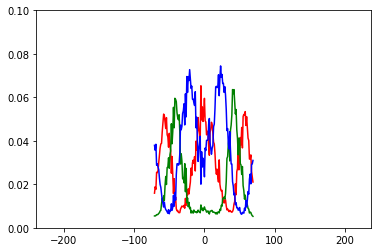

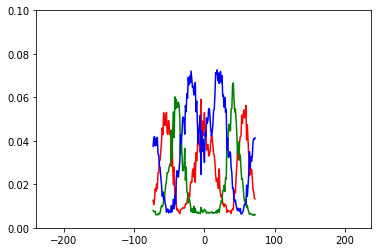

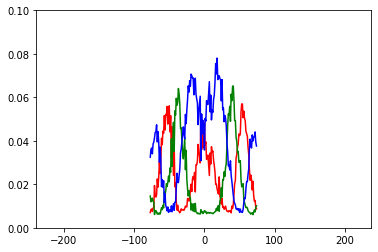

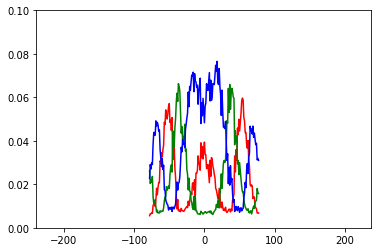

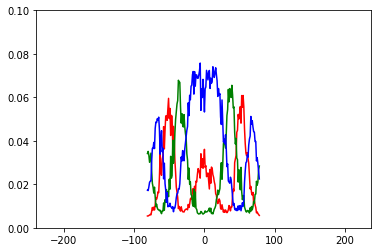

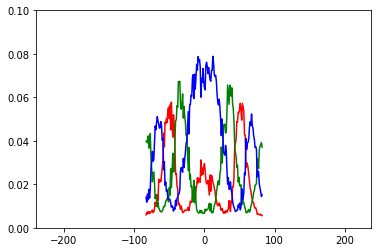

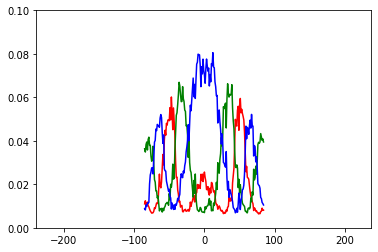

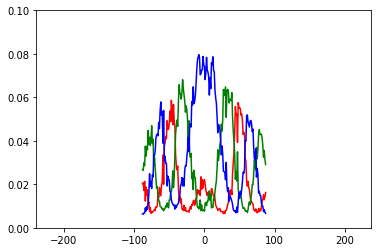

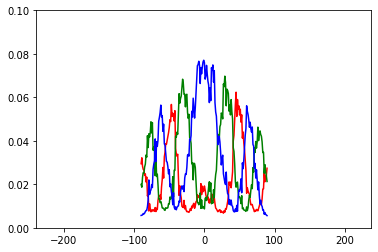

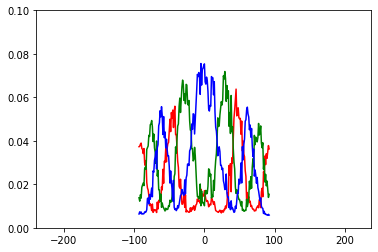

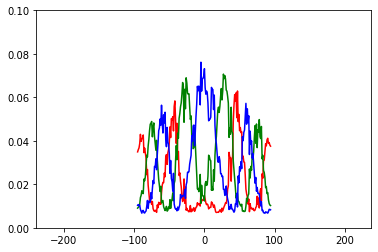

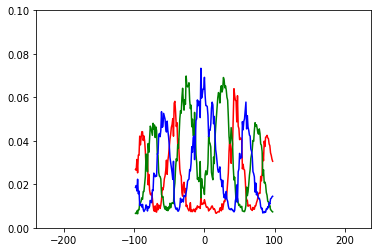

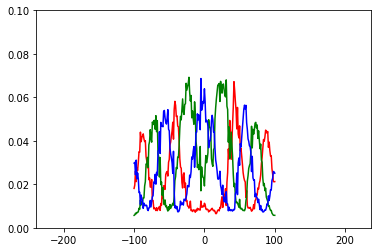

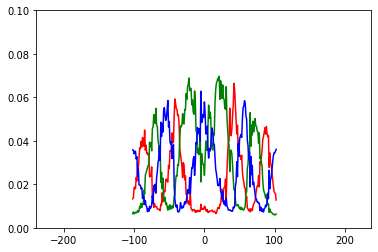

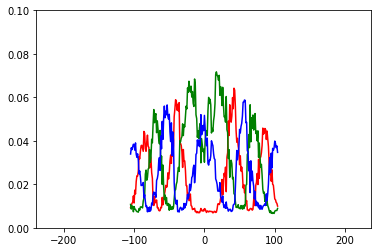

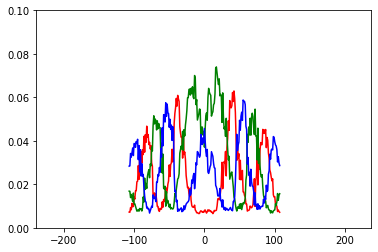

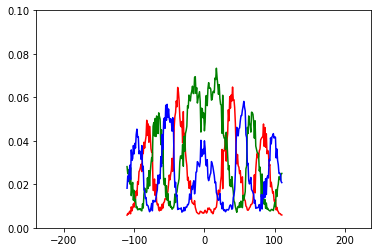

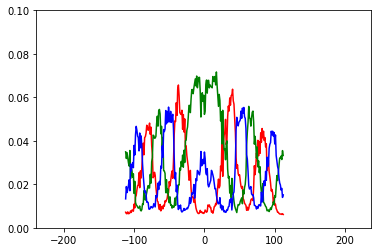

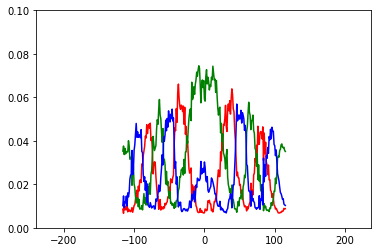

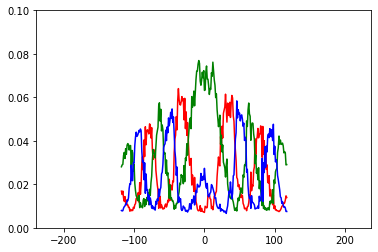

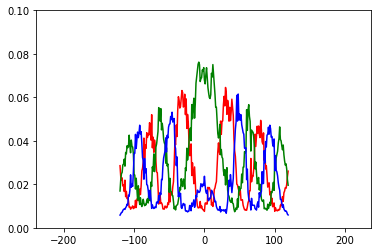

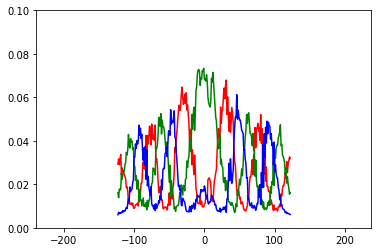

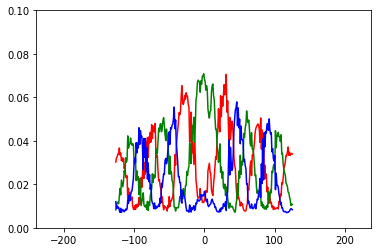

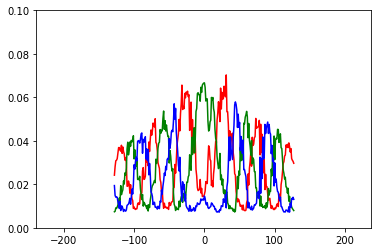

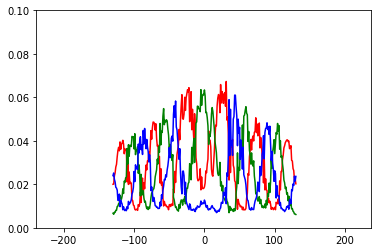

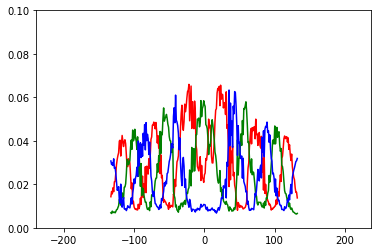

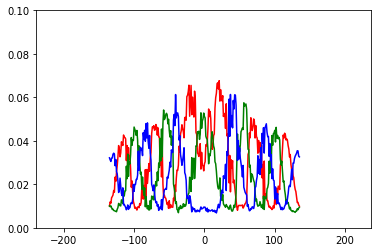

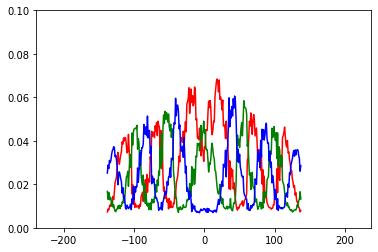

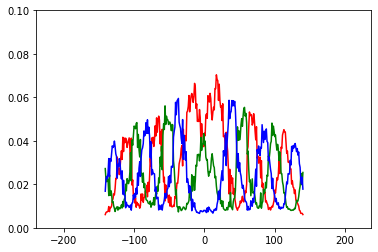

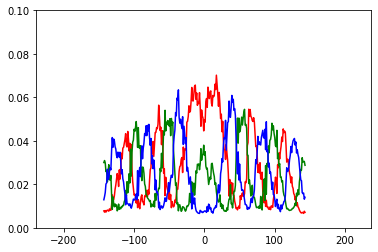

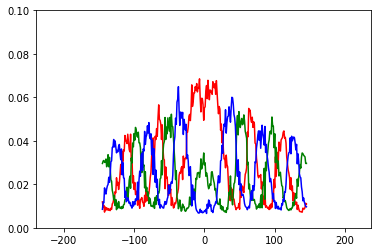

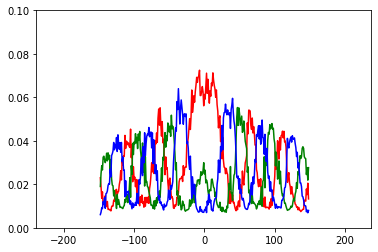

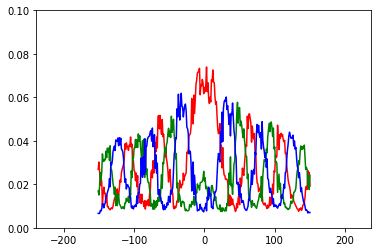

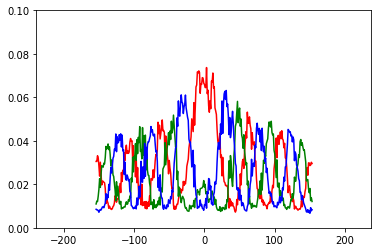

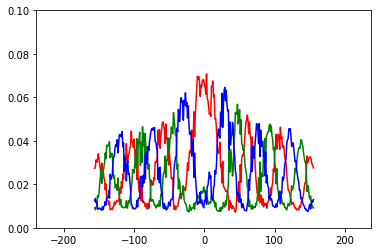

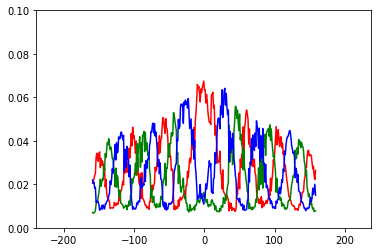

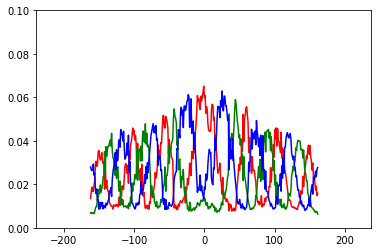

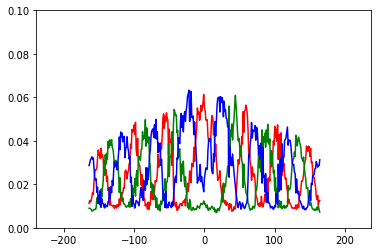

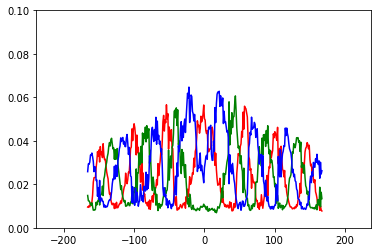

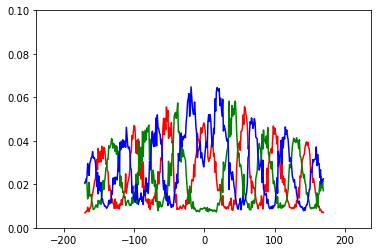

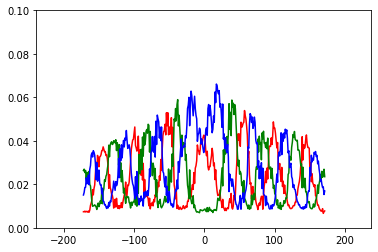

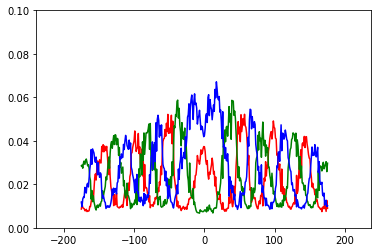

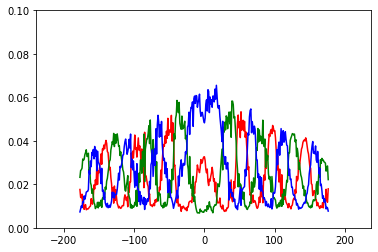

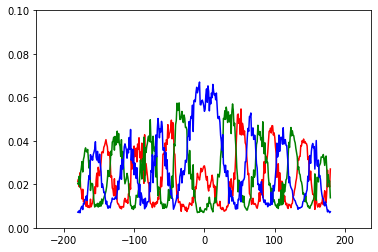

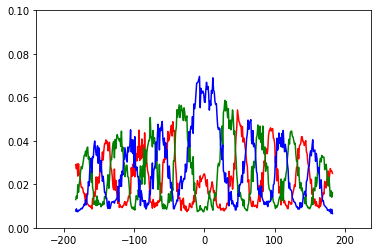

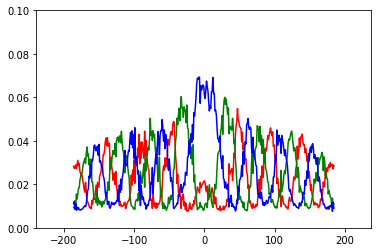

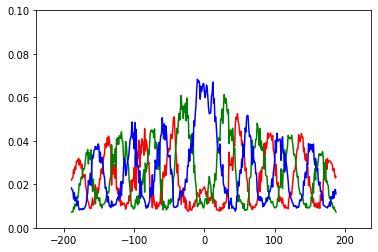

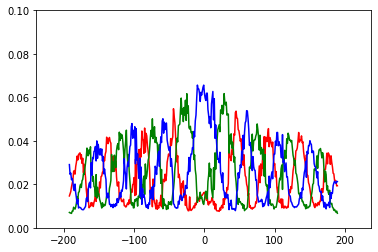

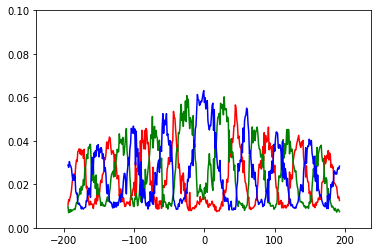

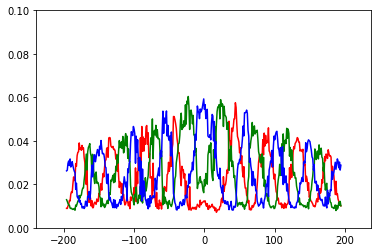

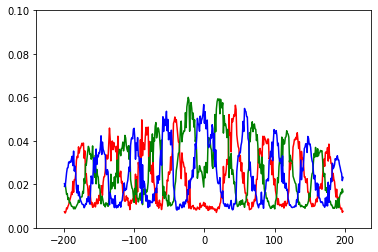

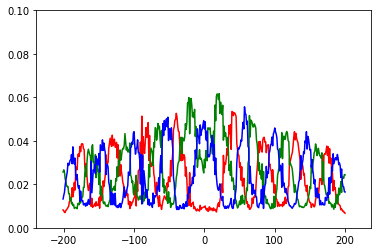

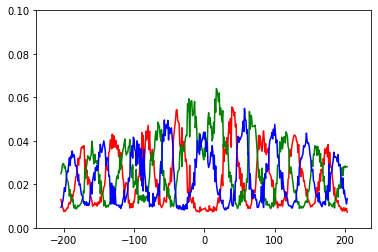

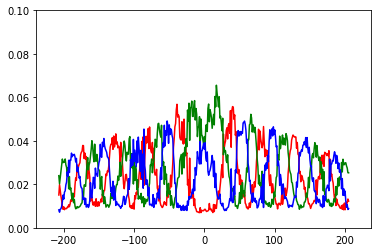

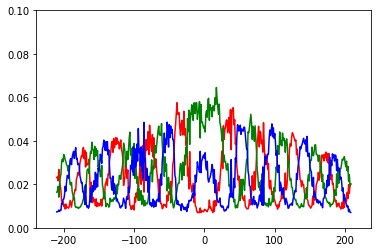

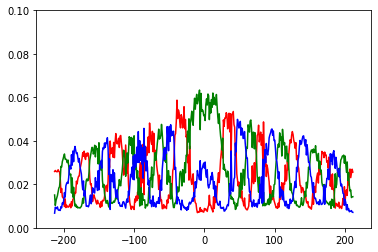

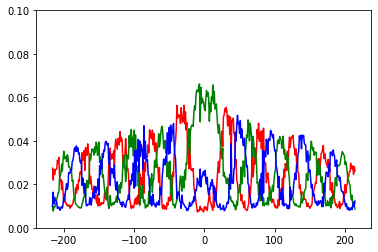

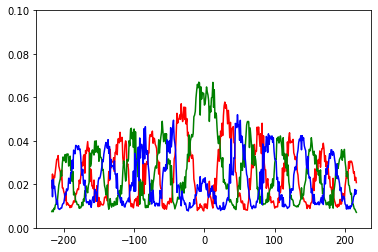

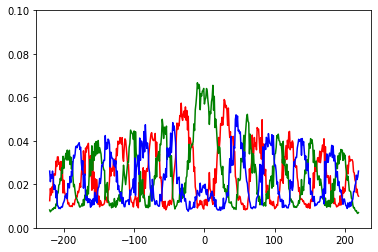

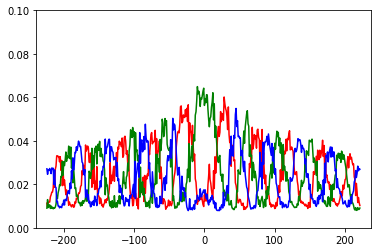

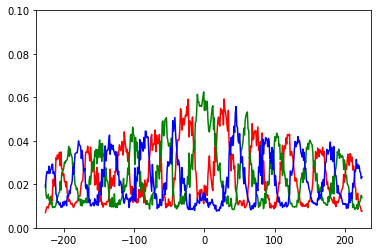

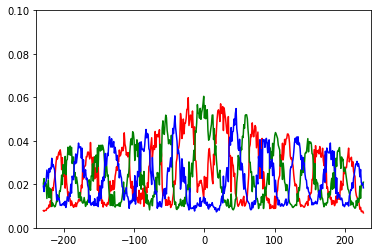

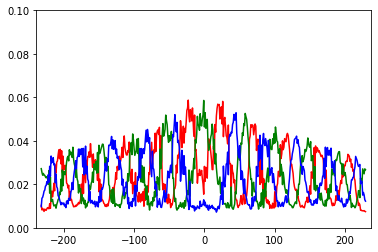

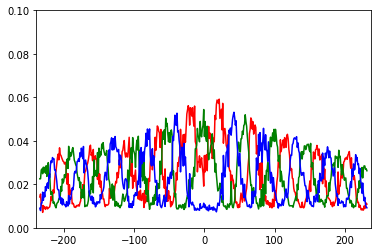

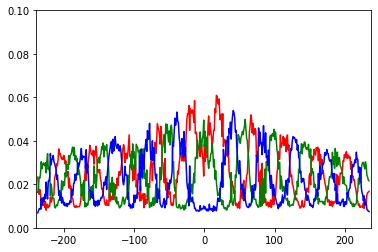

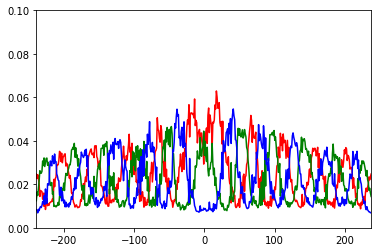

In [149]:
# axis limits
x_min = np.min(database[len(database)-1][1])
x_max = np.max(database[len(database)-1][1])
y_lim = 0
y_max = 0.1
for i, d in enumerate(database):
    plt.figure()
    plt.plot(d[1], d[2], 'r')
    plt.plot(d[1], d[3], 'g')
    plt.plot(d[1], d[4], 'b')    
    plt.xlim(x_min, x_max)
    plt.ylim(y_lim, y_max)
    z = ''
    if len(str(i)) == 1:
        z='000'
    elif len(str(i)) == 2:
        z='00'
    elif len(str(i)) == 3:
        z='0'
    plt.savefig('plots/t' +z+ str(i)+ '.png')

In [150]:
make_video('plots/', 'colony03.avi')

#### kymo

In [161]:
#test
# R
x = database[len(database)-1][1]
x_kym = np.copy(x)